# Predict Heart Disease

*Objective* : Predict the presence of heart disease in patients using the following dataset: [https://archive.ics.uci.edu/ml/datasets/Heart+Disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

After a preliminary analysis of available datasets I chose [https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data) for further study. This dataset is preprocessed and contains a subset of features that have proven relevancy for the study.

Target attribute (presence of heart disease) has 5 values: 0 = no disease, 1-4 = varying degrees of disease. As I'm interested in predicting presence or non-presence I will transform the target in having 2 values.

Predicted value is categorical so I can make use of logistic regression.


# Contents
- [Data Exploration](#data-exploration)
- [Data Cleanup and Preprocessing](#data-cleanup-and-preprocessing)
    - [Add has_heart_disease, drop num](#add-column-hasheartdisease-and-drop-num)
    - [Remove outliers](#remove-outliers)
    - [Remove unexpected values](#remove-unexpected-values)
- [Training](#training)
- [Evaluation](#evaluation)

In [ ]:
# Data Exploration

In [17]:
import pandas as pd
import ydata_profiling
import matplotlib_inline

In [18]:
columns=['age','sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None, names=columns)

In [19]:
df.shape

(303, 14)

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [21]:
df.profile_report(title='Heart Disease (Cleveland)').to_file('heart_disease_profile_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Based on the generated report I have following observations:
- *oldpeak* has 99 (32.7%) zeros. Unclear if that's ok or not. I will ignore for now.
- attributes *trestbps, chol* seem to have outliers. I will drop those records
- attributes *ca, thal* have an unexpected value <b>?</b>. I will drop these records as well
- *num*, the target attribute, has 5 values. 0= no disease, 1-4 = various degrees of disease. I will reduce it to 2 values.


# Data cleanup and preprocessing


#### Add column has_heart_disease and drop num

In [23]:
df['has_heart_disease'] =  df.num > 0
df.drop(['num'], axis=1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,has_heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,False
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,True
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,True
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,False
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,True
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,True
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,True
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,True


#### Remove outliers


<AxesSubplot: >

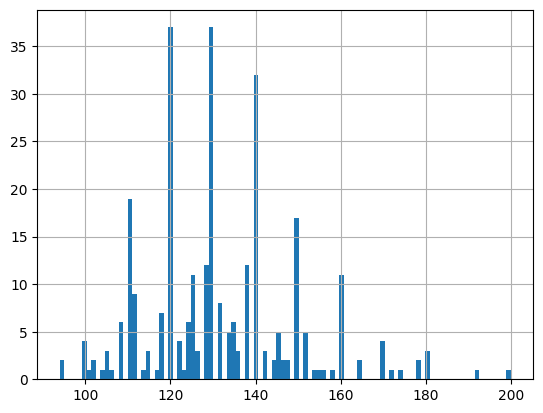

In [30]:
df.trestbps.hist(bins=100)

In [31]:
df2 = df[(df.trestbps >= 100) & (df.trestbps<=180)].reset_index(drop=True)

<AxesSubplot: >

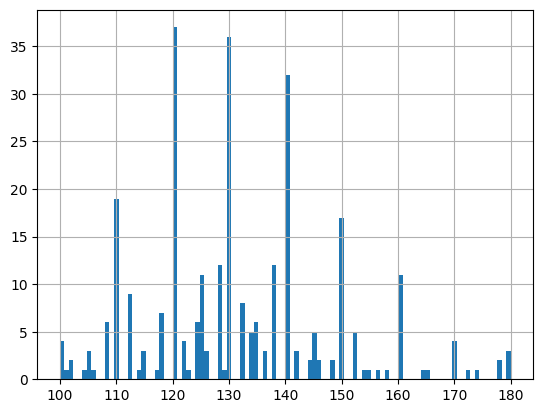

In [32]:
df2.trestbps.hist(bins=100)


<AxesSubplot: >

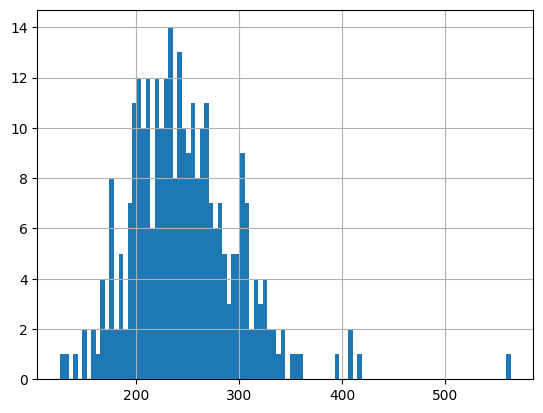

In [33]:
df2.chol.hist(bins=100)


In [34]:
df3 = df2[(df2.chol >= 150) & (df2.chol<=350)].reset_index(drop=True)


<AxesSubplot: >

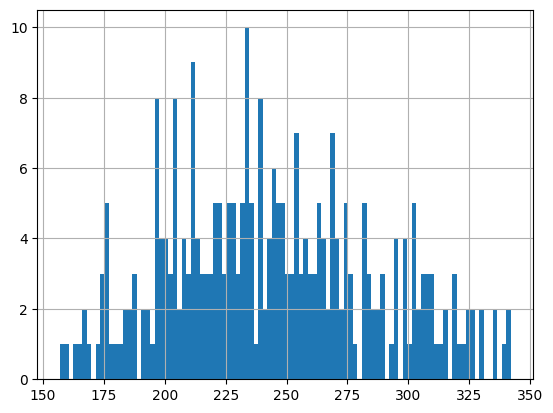

In [35]:
df3.chol.hist(bins=100)


#### Remove unexpected values


In [36]:
df3.ca.unique()


array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [37]:
df3[df3.ca == '?']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,has_heart_disease
157,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0,False
180,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1,True
271,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0,False
285,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0,False


In [38]:
df4 = df3[df3.ca != '?'].reset_index(drop=True)


In [39]:
df4.ca.unique()


array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [40]:
df4.thal.unique()


array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [41]:
df5 = df4[df4.thal != '?'].reset_index(drop=True)


In [42]:
df5.thal.unique()


array(['6.0', '3.0', '7.0'], dtype=object)

# Training


In [44]:
from sklearn.model_selection import train_test_split


In [45]:
df5.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,has_heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,False
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,True
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,True
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,False
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,False


In [46]:
df5.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'has_heart_disease'],
      dtype='object')

In [47]:
y = df5.has_heart_disease


In [48]:
y.head()


0    False
1     True
2     True
3    False
4    False
Name: has_heart_disease, dtype: bool

In [49]:
X = df5[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]


In [50]:
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [52]:
from sklearn.linear_model import LogisticRegression


In [53]:
x_train.shape, y_train.shape


((210, 13), (210,))

In [54]:
lr = LogisticRegression()


In [55]:
lr.fit(x_train, y_train)


/Users/al/.local/share/virtualenvs/dsml--l7kvKj1/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Training is not converging. Trying with scaling.


In [56]:
from sklearn.preprocessing import StandardScaler


In [57]:
scaler = StandardScaler()


In [58]:
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [59]:
X_scaled = scaler.fit_transform(X)


In [60]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)


In [61]:
lr.fit(x_train, y_train)


LogisticRegression()

# Evaluation


In [62]:
pred = lr.predict(x_test)


In [63]:
from sklearn.metrics import accuracy_score


In [64]:
accuracy_score(y_test, pred)


0.8285714285714286